<a href="https://colab.research.google.com/github/candelapalomeque/Analisis_Predictivo/blob/main/Trabajo_Practico_2_AP_Ultimo_PY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
from google.colab import files


In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [36]:
entrenar = pd.read_csv("entrenar.csv")
test = pd.read_csv("test.csv")

In [37]:
resultados = pd.read_csv("resultadoss.csv")


In [38]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor

In [39]:
from sklearn.metrics import r2_score

ARBOL

In [ ]:
Y_entrenar=entrenar["averageRating"]
X_entrenar=entrenar[["numVotes" , "runtimeMinutes" , "startYear"  , "isAdult", "directorbueno" , "directormalo","writerbueno" , "writermalo" , "isOriginalTitle" ]]

Y_test=test["averageRating"]
X_test=test[["numVotes" , "runtimeMinutes" , "startYear" , "isAdult", "directorbueno" , "directormalo","writerbueno" , "writermalo" , "isOriginalTitle" ]]

fila = []

for i in range(25,35,2):
  print(i)
  regr2 = ExtraTreesRegressor(max_depth=i)
  fregr2 = regr2.fit(X_entrenar,Y_entrenar)
  r2_entrenar = fregr2.score(X_entrenar, Y_entrenar)
  r2_test = fregr2.score(X_entrenar, Y_entrenar)
  fila.append([i,r2_entrenar,r2_test])

25
27
29
31
33


In [ ]:
scores_profundidad = pd.DataFrame(fila, columns=["max_depth","r2_entrenar","r2_test"])
scores_profundidad

,max_depth,r2_entrenar,r2_test
0,25,0.458214,0.458214
1,27,0.526923,0.526923
2,29,0.589170,0.589170
3,31,0.628890,0.628890
4,33,0.657879,0.657879


In [ ]:
datos = pd.read_csv("datoss.csv")

ValueError: ignored

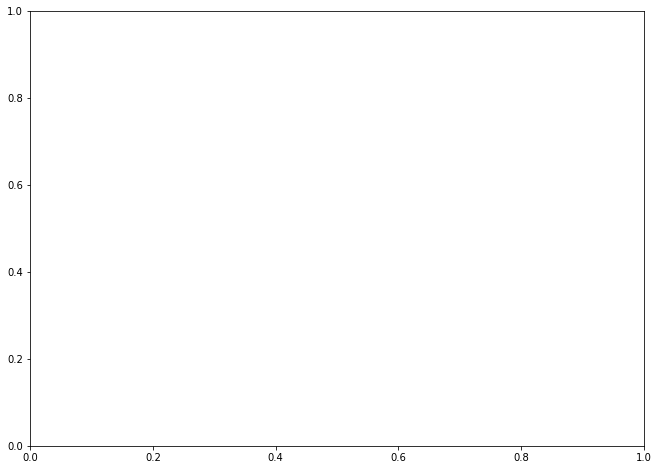

In [ ]:
fig, ax = plt.subplots(figsize=(11,8))
ax = sns.lineplot(df=scores_profundidad, x="max_depth", y="r2_entrenar", color = 'orange')
ax = sns.lineplot(df=scores_profundidad, x="max_depth", y="r2_test", color = 'blue')


In [ ]:
fila2 = []

for i in range(155,171,5):
  regr2 = ExtraTreesRegressor(max_depth=29,n_estimators=i,random_state=42)
  fregr2 = regr2.fit(X_entrenar,Y_entrenar)

  r2_entrenar = fregr2.score(X_entrenar, Y_entrenar)
  r2_test = fregr2.score(X_test, Y_test)
  fila2.append([i,r2_entrenar,r2_test])
  print(f'n_estimators: {i} => r2_entrenar: {r2_entrenar} - r2_test: {r2_test}')

n_estimators: 155 => r2_entrenar: 0.5882780229007627 - r2_test: 0.21496476931762087
n_estimators: 160 => r2_entrenar: 0.5889614784258749 - r2_test: 0.2147087586505162
n_estimators: 165 => r2_entrenar: 0.5894534284733027 - r2_test: 0.21463811563598556
n_estimators: 170 => r2_entrenar: 0.5897363600503174 - r2_test: 0.21468442245743036


In [ ]:
scores_n_estimators = pd.DataFrame(fila2, columns=["n_estimators","r2_entrenar","r2_test"])
scores_n_estimators

,n_estimators,r2_entrenar,r2_test
0,155,0.588278,0.214965
1,160,0.588961,0.214709
2,165,0.589453,0.214638
3,170,0.589736,0.214684


In [ ]:
regr2 = ExtraTreesRegressor(max_depth=29,n_estimators=160,random_state=42,bootstrap=True)
fregr2 = regr2.fit(X_entrenar,Y_entrenar)

In [ ]:
fregr2.score(X_entrenar, Y_entrenar)

0.5437124954893187

In [ ]:
fregr2.score(X_test, Y_test)

0.23426039386484

In [ ]:
iniciales =[["numVotes" , "runtimeMinutes" , "startYear"  , "isAdult", "directorbueno" , "directormalo","writerbueno" , "writermalo" , "isOriginalTitle" ]]

In [ ]:
importances = []
for i in range(len(iniciales)):
  importances.append([iniciales[i], fregr2.feature_importances_[i]])

importances = pd.DataFrame(importances, columns=["feature", "importance"])
importances.sort_values(by='importance',ascending = False)

,feature,importance
0,"[numVotes, runtimeMinutes, startYear, isAdult,...",0.367008


RANDOM FOREST

In [33]:
Y_entrenar=entrenar["averageRating"]
X_entrenar=entrenar[["numVotes" , "runtimeMinutes" , "startYear" , "seasonNumber", "episodeNumber" , "isAdult", "runtime", "directorbueno" , "directormalo","writerbueno" , "writermalo" , "isOriginalTitle" ]]

Y_test=test["averageRating"]
X_test=test[["numVotes" , "runtimeMinutes" , "startYear" , "episodeNumber" , "isAdult", "runtime","directorbueno" , "directormalo","writerbueno" , "writermalo" , "isOriginalTitle" ]]

fila3 = []

for i in range(200,350,123):
  print(i)
  regr3 = RandomForestRegressor(max_depth=i,random_state=42)
  fregr3 = regr3.fit(X_entrenar,Y_entrenar)
  r2_entrenar = fregr3.score(X_entrenar, Y_entrenar)
  r2_test = fregr3.score(X_test, Y_test)
  fila3.append([i,r2_entrenar,r2_test])

200


ValueError: ignored

In [ ]:
scores_profundidad2 = pd.DataFrame(fila3, columns=["max_depth","r2_entrenar","r2_test"])
scores_profundidad2

In [ ]:
fila4 = []

for i in range(355,231,167):
  regr2 = RandomForestRegressor(max_depth=19,n_estimators=i,random_state=42)
  fregr2 = regr2.fit(X_entrenar,Y_entrenar)

  r2_entrenar = fregr2.score(X_entrenar, Y_entrenar)
  r2_test = fregr2.score(X_test, Y_test)
  fila4.append([i,r2_entrenar,r2_test])
  print(f'n_estimators: {i} => r2_entrenar: {r2_entrenar} - r2_test: {r2_test}')

In [ ]:
scores_n_estimators2 = pd.DataFrame(fila4, columns=["n_estimators","r2_entrenar","r2_test"])
scores_n_estimators2

In [ ]:
regr2 = RandomForestRegressor(max_depth=19,n_estimators=i,random_state=42)
rf_optimo = RandomForestRegressor(max_depth=19,n_estimators=165,random_state=42)
rf_optimo = regr2.fit(X_entrenar,Y_entrenar)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
 fregr2 = regr2.fit(X_test,Y_test)
 r2_test = fregr2.score(X_test, Y_test)
 r2_test

RESULTADOS


In [ ]:
resultados = pd.read_csv("resultadoss.csv")
resultados = resultados[["numVotes" , "runtimeMinutes" , "startYear"  , "isAdult", "directorbueno" , "directormalo","writerbueno" , "writermalo" , "isOriginalTitle" ]]

In [ ]:
predic = fregr2.predict(resultados)

In [ ]:
resultados.head()

In [ ]:
resultados2 = pd.read_csv("resultados.csv")

In [ ]:
exit = pd.DataFrame(data={"averageRating": predic}).astype(str)
exit.index = resultados2.id
exit.to_csv("prediccion_RandomFores.csv", sep = ',', index = True, index_label = 'id')